In [2]:
import pennylane as qml
import torch

In [11]:
x=torch.empty(2,3)
t = torch.empty(2,)
print(t)

tensor([-2.6867e+10,  3.0677e-41])


In [23]:
17//2

8

In [14]:
 temp = torch.rand(2,3)
print(temp)

tensor([[0.3072, 0.2737, 0.6869],
        [0.3061, 0.5934, 0.1625]])


In [24]:
y1 = torch.full((4,), 1) 
print(y1)
y2 = torch.full((4,), -1)
print(y2)
y3 = torch.cat((y1,y2))
print(y3)
print(len(y3))

tensor([1., 1., 1., 1.])
tensor([-1., -1., -1., -1.])
tensor([ 1.,  1.,  1.,  1., -1., -1., -1., -1.])
8


In [47]:
from torch.utils.data import Dataset


class makedata(Dataset):
    def __init__(self, col, n_feat, maximum):
        self.col = col
        self.n_feat = n_feat
        self.maximum = maximum
        self.classes = 2

        if col%2 != 0:
            col = col+1
            print("Making datasize an even number for ease: col =", col)
        
        self.Xdata = torch.rand(col, n_feat)*maximum
        self.Ydata = torch.cat((torch.full((col//2,), 1),torch.full((col//2,), -1)))
         

    def __len__(self):
        return len(self.Ydata)

    def __getitem__(self, idx):
        return self.Xdata[idx],self.Ydata[idx]


In [54]:
data = makedata(6, 2, 5)
print(len(data))
print(data.Xdata)
print(data.Ydata)
x,y = data.__getitem__(2)
print(x,y)

6
tensor([[1.6446, 0.6679],
        [2.7540, 4.8041],
        [4.9685, 0.9697],
        [2.7883, 0.7677],
        [2.6686, 1.1711],
        [0.0475, 1.3894]])
tensor([ 1.,  1.,  1., -1., -1., -1.])
tensor([4.9685, 0.9697]) tensor(1.)


In [55]:
data_batches = DataLoader(data, batch_size=2, shuffle=True)
for d in data_batches:
    print(d)

[tensor([[2.7540, 4.8041],
        [0.0475, 1.3894]]), tensor([ 1., -1.])]
[tensor([[1.6446, 0.6679],
        [2.6686, 1.1711]]), tensor([ 1., -1.])]
[tensor([[4.9685, 0.9697],
        [2.7883, 0.7677]]), tensor([ 1., -1.])]


ValueError: Unrecognized character a in format string

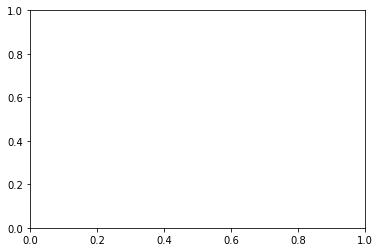

In [60]:
import matplotlib.pyplot as plt

plt.plot(data.Xdata[0:6//2], "scatter")
plt.show()